This notebook has porpuse of showing the dataset that we used, alongside the prediction of the different cosmological models that we analyzed.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.constants import c as c_light #meters/seconds
from scipy.integrate import cumtrapz as cumtrapz
c_light_km = c_light/1000 #kilometers/seconds

import os
import git
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
path_datos_global = os.path.dirname(path_git)

os.chdir(path_git); os.sys.path.append('./fr_mcmc/utils/')
from solve_sys import Hubble_th as Hubble_th
from LambdaCDM import H_LCDM
from change_of_parameters import omega_luisa_to_CDM


Here we define the plotting function.

In [2]:
def plot_data(  theta, 
                num_z_points = int(10**5), 
                model='GILA',
                close = False):

    '''Given the model parameters, return the plots 
    of the data with the prediction of the cosmological model.'''

    [_, L_bar, omega_m_luisa, b, H_0] = theta

    physical_params = [L_bar, b, H_0, omega_m_luisa]

    zs_model, Hs_model = Hubble_th(physical_params, model=model,
                                z_min=0, z_max=10, num_z_points=num_z_points)
    
    omega_m_lcdm = omega_luisa_to_CDM(b,L_bar,H_0,omega_m_luisa)

    zs_model_lcdm = np.linspace(0,3,int(10**5))
    
    plt.figure()
    plt.grid()
    plt.title('GILA MODEL')
    plt.plot(zs_model,Hs_model,label='GILA')
    plt.plot(zs_model_lcdm, H_LCDM(zs_model_lcdm,omega_m_lcdm,H_0),'k--',label=r'$\rm \Lambda CDM$') 
    plt.legend()
    plt.xlabel('H(z) [km/seg/Mpc]')
    plt.xlabel('z (redshift)')
    if close==True:
        plt.close()


Here is a concrete example. First, we import the datasets.

Now, we call the ploting function

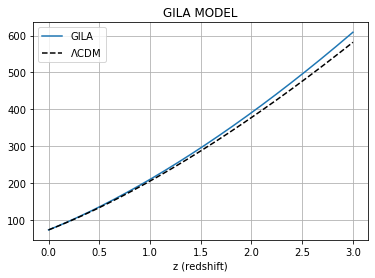

In [14]:
omega_m_input = 1.6
omega_m_luisa = 0.9999 + 10**(-5) * omega_m_input
'''
\mathrm{$M_{abs}$} = -19.297_{-0.026(0.051)}^{+0.024(0.049)} 
\mathrm{$\beta$} = 4.021_{-0.136(0.308)}^{+0.171(0.294)} 
\mathrm{$H_{0}$} = 71.867_{-0.859(1.743)}^{+0.876(1.724)} 
\mathrm{$\Omega_m$} = 0.894_{-0.025(0.174)}^{+0.106(0.106)} 
'''
sol = [_, 0.9, 0.894, 4.021, 71.867]    #[M_abs, L_bar, omega_m_luisa, b, H_0]
sol = [_, 1.0, 0.969, 10, 73.867]    #[M_abs, L_bar, omega_m_luisa, b, H_0]


plot_data(sol, model = 'GILA',
            close = False)